# Example data overview

**Source:**

Download pandas json : https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json

**Context:**

These are deviations of floor vs ceiling corners of one of our models with ground truth labels for the room name and number of corners in that room with predictions. Please create meaningful statistics of how well the model performed.

- `Gt_corners` = ground truth number of corners in the room 
- `Rb_corners` = number of corners found by the model
- `mean`, `max`, `min` and all others are deviation values in degrees.

In [1]:
import pandas as pd
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
df = pd.read_json('https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json')
df.head()

,name,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
0,Schlafzimmer,4,4,3.956313,8.562939,0.274574,3.987864,8.562939,0.274574,3.924762,8.501885,0.331494
1,Küche,4,4,23.019122,52.605437,0.724299,1.253103,1.897612,0.724299,44.785141,52.605437,36.880814
2,Bathroom,4,4,1.013833,1.950322,0.301673,0.659138,1.318714,0.301673,1.368528,1.950322,0.878106
3,Lounge/Diner,8,8,3.832620,18.236935,0.173307,3.600083,15.041431,0.173307,4.065157,18.236935,0.253457
4,Essbereich,4,4,8.017758,15.642853,0.762948,7.819446,15.399635,0.762948,8.216069,15.642853,0.909029


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1347 entries, 0 to 1346
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1347 non-null   object 
 1   gt_corners    1347 non-null   int64  
 2   rb_corners    1347 non-null   int64  
 3   mean          1347 non-null   float64
 4   max           1347 non-null   float64
 5   min           1347 non-null   float64
 6   floor_mean    1347 non-null   float64
 7   floor_max     1347 non-null   float64
 8   floor_min     1347 non-null   float64
 9   ceiling_mean  1347 non-null   float64
 10  ceiling_max   1347 non-null   float64
 11  ceiling_min   1347 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 136.8+ KB


Let's check the amount of full duplicates

In [4]:
df.duplicated().sum()

0

In [5]:
df.gt_corners.unique()

array([ 4,  8,  6, 10])

In [6]:
df.rb_corners.unique()

array([ 4,  8,  6, 10])

In [7]:
metrics.f1_score(df.gt_corners, df.rb_corners, average='micro')

1.0

If I understand correctly that the column `gt_corners` contains actual values, and the column `rb_corners` contains predictions, then based on the f1 score, the model worked with 100% accuracy.

In [8]:
df[df['rb_corners'] != df['gt_corners']]['name'].count()

0

In [9]:
df['mean_check'] = (df['floor_mean'] + df ['ceiling_mean']) / 2

In [10]:
df.head()

,name,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min,mean_check
0,Schlafzimmer,4,4,3.956313,8.562939,0.274574,3.987864,8.562939,0.274574,3.924762,8.501885,0.331494,3.956313
1,Küche,4,4,23.019122,52.605437,0.724299,1.253103,1.897612,0.724299,44.785141,52.605437,36.880814,23.019122
2,Bathroom,4,4,1.013833,1.950322,0.301673,0.659138,1.318714,0.301673,1.368528,1.950322,0.878106,1.013833
3,Lounge/Diner,8,8,3.832620,18.236935,0.173307,3.600083,15.041431,0.173307,4.065157,18.236935,0.253457,3.832620
4,Essbereich,4,4,8.017758,15.642853,0.762948,7.819446,15.399635,0.762948,8.216069,15.642853,0.909029,8.017758


By this check, we can conclude that the columns `mean`, `max`, `min` represent the average of the ceiling and floor values.

In [11]:
len(df['name'].unique())

588

In [12]:
data = {'name': df['name'].value_counts().index, 'count': df['name'].value_counts().values}
data = pd.DataFrame(data=data).sort_values(by='count', ascending= False)

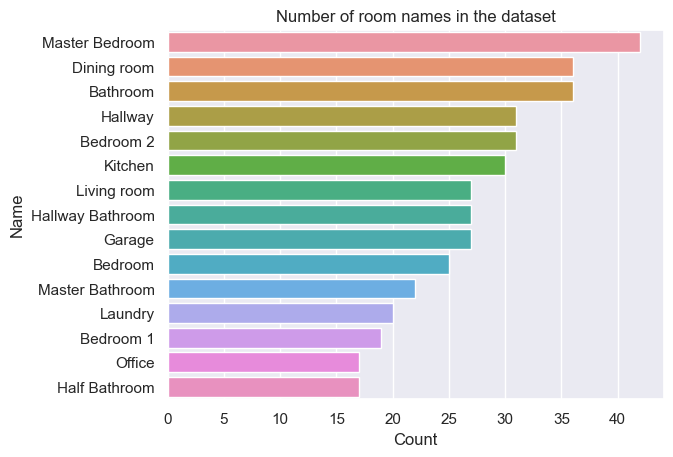

In [13]:
a = sns.barplot(x='count', y='name', data=data[:15])
a.set(xlabel='Count', ylabel='Name', 
      title='Number of room names in the dataset')
plt.show()

Room names are not unique, the table stores data for multiple instances of rooms such as `Master Bedroom`, `Dining Room`, `Bathroom`, etc.